In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from qtrendutils import binplot_utils as binplot
from qtrendutils import colorbar_utils as cbars
from qtrendutils import averaging_utils as avg
import importlib
importlib.reload(binplot)

import sys

plt.rc('font', family='Arial')

In [2]:
plotpath="/project/cas/islas/python_plots/qtrend_paper/figures/supplemental/"

In [3]:
landfrac = xr.open_dataset("../../DATA_SORT/LANDFRAC_LENS2.nc")
landfrac = landfrac.landfrac
landfrac = landfrac.where(landfrac > 0, nan)
landfrac = landfrac.where(landfrac.lat > -60, nan) # omitting Antarctica

### Global temperature trends averaged over various regions

In [4]:
era5_trend = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_ERA5.nc")
era5_trend['lon'] = landfrac.lon ; era5_trend['lat'] = landfrac.lat
cmip6_trend = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_CMIP6.nc")
cmip6_trend['lon'] = landfrac.lon ; cmip6_trend['lat'] = landfrac.lat

era5_tasland = avg.cosweightlonlat(era5_trend.T2m*landfrac,0,360,-90,90)
cmip6_tasland = avg.cosweightlonlat(cmip6_trend.tas*landfrac,0,360,-90,90)

era5_tasglob = avg.cosweightlonlat(era5_trend.T2m,0,360,-90,90)
cmip6_tasglob = avg.cosweightlonlat(cmip6_trend.tas, 0, 360, -90,90)

era5_gmt = avg.cosweightlonlat(era5_trend.T2m, 0, 360, -90, 90)
cmip6_gmt = avg.cosweightlonlat(cmip6_trend.tas, 0, 360, -90, 90)

In [5]:
obs_binned_monthly = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/bin_monthly/obs_binned_monthly.nc")
q_binned_monthly_era5_pcnt_perk = obs_binned_monthly.q_pcnt / era5_tasland
q_binned_monthly_era5_pcnt_perglobalk = obs_binned_monthly.q_pcnt / era5_tasglob
q_binned_monthly_era5_pcnt_perlocalk = obs_binned_monthly.q_pcnt / obs_binned_monthly.tas

vp_binned_monthly_era5_pcnt_perk = obs_binned_monthly.vp_pcnt / era5_tasland
vp_binned_monthly_era5_pcnt_perlocalk = obs_binned_monthly.vp_pcnt / obs_binned_monthly.tas


cmip6_binned_monthly = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/bin_monthly/CMIP6_binned_monthly.nc")
cmip6_binned_monthly_pcnt_perk = cmip6_binned_monthly.q_pcnt / cmip6_tasland
cmip6_binned_monthly_pcnt_perglobalk = cmip6_binned_monthly.q_pcnt / cmip6_tasglob
cmip6_binned_monthly_pcnt_perlocalk = cmip6_binned_monthly.q_pcnt / cmip6_binned_monthly.tas

cmip6_binned_monthly_em = cmip6_binned_monthly.mean('member', skipna=True)
cmip6_binned_monthly_mmm = cmip6_binned_monthly_em.mean('model')

cmip6_binned_monthly_pcnt_perk_em = cmip6_binned_monthly_pcnt_perk.mean('member', skipna=True)
cmip6_binned_monthly_pcnt_perk_mmm = cmip6_binned_monthly_pcnt_perk_em.mean('model')

cmip6_binned_monthly_pcnt_perlocalk_em = cmip6_binned_monthly_pcnt_perlocalk.mean('member', skipna=True)
cmip6_binned_monthly_pcnt_perlocalk_mmm = cmip6_binned_monthly_pcnt_perlocalk_em.mean('model')

cmip6_binned_monthly_pcnt_perglobalk_em = cmip6_binned_monthly_pcnt_perglobalk.mean('member', skipna=True)
cmip6_binned_monthly_pcnt_perglobalk_mmm = cmip6_binned_monthly_pcnt_perglobalk_em.mean('model')

In [6]:
import importlib
importlib.reload(binplot)

<module 'qtrendutils.binplot_utils' from '/home/islas/python/qtrend_paper/qtrendutils/binplot_utils.py'>

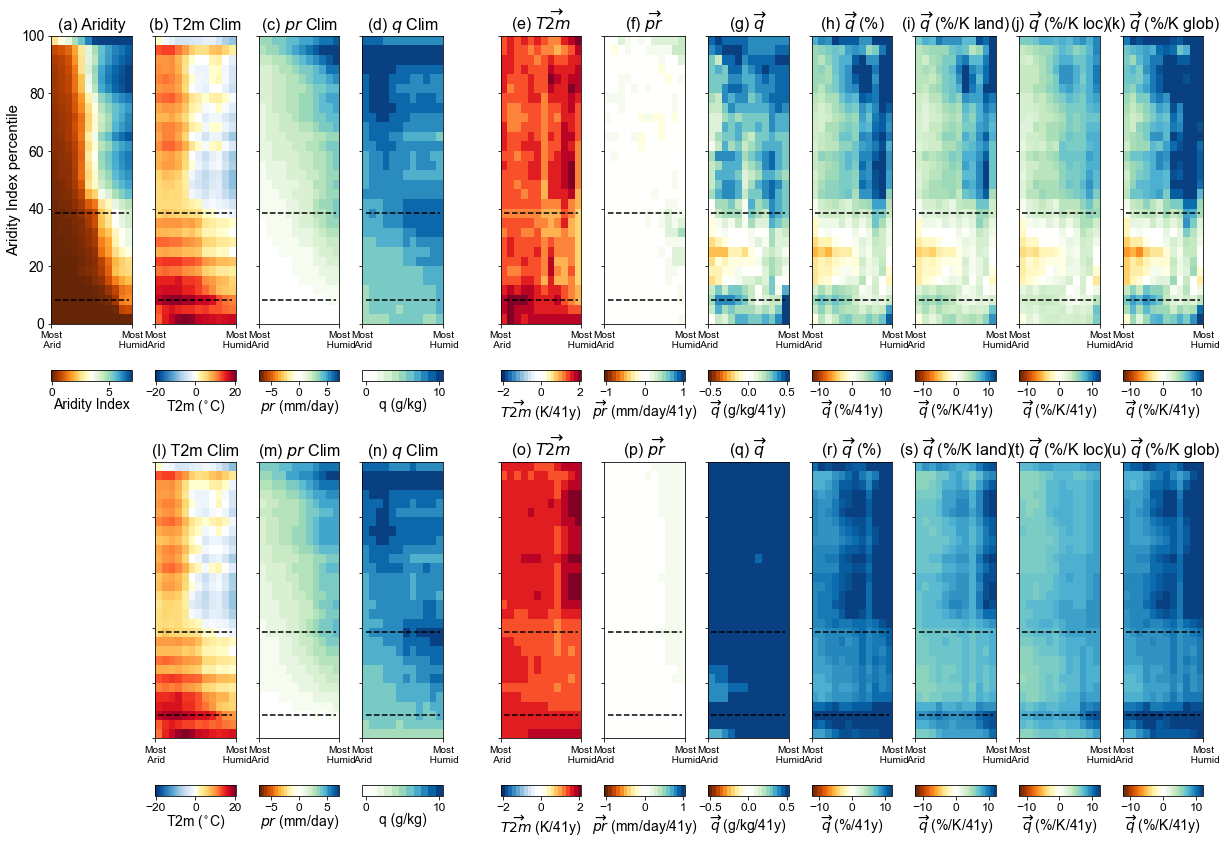

In [11]:
fig = plt.figure(figsize=(16,16))

#-------------------------------------------------OBS---------------------------------------------
#---------------Aridity Index
ax = binplot.plot_binned_data_monthly(fig, obs_binned_monthly.aridity, obs_binned_monthly.aridity_am, 0.05,0,7,'(a) Aridity',
                                      0.0,0.07,0.66,0.91,ylabel=True, fsize=16)

ax = cbars.plotcolorbar(fig, 0.05,0,7,'Aridity Index',0.0,0.07,0.61,0.62,cmap='precip', fsize=12)

#---------------
ax = binplot.plot_binned_data_monthly(fig, obs_binned_monthly.tas_clim_2020-273.15, obs_binned_monthly.aridity_am,0.5,-20,20,'(b) T2m Clim',
                                      0.09,0.16,0.66,0.91,ylabel=False,  cmap='blue2red', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-20,20,'T2m ($^{\circ}$C)',0.09,0.16,0.61,0.62,cmap='blue2red', fsize=12)

#---------------
ax = binplot.plot_binned_data_monthly(fig, obs_binned_monthly.gpcc_clim_2020, obs_binned_monthly.aridity_am, 0.5,-7,7,'(c) $pr$ Clim',
                                      0.18,0.25,0.66,0.91,ylabel=False, fsize=16)
ax = cbars.plotcolorbar(fig,0.5,-7,7,'$pr$ (mm/day)',0.18,0.25,0.61,0.62,cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, 1000.*obs_binned_monthly.q_clim_2020, obs_binned_monthly.aridity_am, 1,-10,10,'(d) $q$ Clim',
                                      0.27,0.34,0.66,0.91,ylabel=False, fsize=16)
ax = cbars.plotcolorbar(fig, 1,-10,10,'q (g/kg)',0.27,0.34,0.61,0.62,cmap='precip',posneg='pos', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, obs_binned_monthly.tas, obs_binned_monthly.aridity_am, 0.2,-2,2,'(e) $\overrightarrow{T2m}$',
                                      0.39,0.46,0.66,0.91,ylabel=False, cmap='blue2red', fsize=16)
ax = cbars.plotcolorbar(fig,0.2,-2,2,'$\overrightarrow{T2m}$ (K/41y)',0.39,0.46,0.61,0.62, fsize=12)


ax = binplot.plot_binned_data_monthly(fig, obs_binned_monthly.pr, obs_binned_monthly.aridity_am, 0.1,-1,1,'(f) $\overrightarrow{pr}$',
                                      0.48,0.55,0.66,0.91,ylabel=False, cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.1,-1,1,'$\overrightarrow{pr}$ (mm/day/41y)',0.48,0.55,0.61,0.62, cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, 1000.*obs_binned_monthly.q, obs_binned_monthly.aridity_am, 0.05,-0.5,0.5,'(g) $\overrightarrow{q}$',
                                      0.57,0.64,0.66,0.91,ylabel=False, cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.05,-0.5,0.5,'$\overrightarrow{q}$ (g/kg/41y)',0.57,0.64,0.61,0.62,cmap='precip',fsize=12)


ax = binplot.plot_binned_data_monthly(fig, obs_binned_monthly.q_pcnt, obs_binned_monthly.aridity_am, 0.5,-12,12,'(h) $\overrightarrow{q}$ (%)',
                                      0.66,0.73,0.66,0.91,ylabel=False,cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-12,12,'$\overrightarrow{q}$ (%/41y)',0.66,0.73,0.61,0.62, cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, q_binned_monthly_era5_pcnt_perk, obs_binned_monthly.aridity_am, 0.5,-12,12,'(i) $\overrightarrow{q}$ (%/K land)',
                                      0.75,0.82,0.66,0.91,ylabel=False,cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-12,12,'$\overrightarrow{q}$ (%/K/41y)',0.75,0.82,0.61,0.62, cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, q_binned_monthly_era5_pcnt_perlocalk, obs_binned_monthly.aridity_am, 0.5, -12, 12,'(j) $\overrightarrow{q}$ (%/K loc)',
                                      0.84,0.91,0.66,0.91,ylabel=False, cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-12,12,'$\overrightarrow{q}$ (%/K/41y)',0.84,0.91,0.61,0.62, cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, q_binned_monthly_era5_pcnt_perglobalk, obs_binned_monthly.aridity_am, 0.5, -12, 12,'(k) $\overrightarrow{q}$ (%/K glob)',
                                      0.93,1.0,0.66,0.91,ylabel=False, cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-12,12,'$\overrightarrow{q}$ (%/K/41y)',0.93,1.,0.61,0.62, cmap='precip', fsize=12)


#----------------------------CMIP6
ax = binplot.plot_binned_data_monthly(fig, cmip6_binned_monthly_mmm.tas_clim_2020-273.15, obs_binned_monthly.aridity_am,0.5,-20,20,'(l) T2m Clim',
                                      0.09,0.16,0.3,0.54,ylabel=False,  cmap='blue2red', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-20,20,'T2m ($^{\circ}$C)',0.09,0.16,0.25,0.26,cmap='blue2red', fsize=12)

ax = binplot.plot_binned_data_monthly(fig, cmip6_binned_monthly_mmm.pr_clim_2020, obs_binned_monthly.aridity_am, 0.5,-7,7,'(m) $pr$ Clim',
                                      0.18,0.25,0.3,0.54,ylabel=False, fsize=16)
ax = cbars.plotcolorbar(fig,0.5,-7,7,'$pr$ (mm/day)',0.18,0.25,0.25,0.26,cmap='precip', fsize=12)

ax = binplot.plot_binned_data_monthly(fig, 1000.*cmip6_binned_monthly_mmm.q_clim_2020, obs_binned_monthly.aridity_am, 1,-10,10,'(n) $q$ Clim',
                                      0.27,0.34,0.3,0.54,ylabel=False, fsize=16)
ax = cbars.plotcolorbar(fig, 1,-10,10,'q (g/kg)',0.27,0.34,0.25,0.26,cmap='precip',posneg='pos', fsize=12)

ax = binplot.plot_binned_data_monthly(fig, cmip6_binned_monthly_mmm.tas, obs_binned_monthly.aridity_am, 0.2,-2,2,'(o) $\overrightarrow{T2m}$',
                                      0.39,0.46,0.3,0.54,ylabel=False, cmap='blue2red', fsize=16)
ax = cbars.plotcolorbar(fig,0.2,-2,2,'$\overrightarrow{T2m}$ (K/41y)',0.39,0.46,0.25,0.26, fsize=12)


ax = binplot.plot_binned_data_monthly(fig, cmip6_binned_monthly_mmm.pr, obs_binned_monthly.aridity_am, 0.1,-1,1,'(p) $\overrightarrow{pr}$',
                                      0.48,0.55,0.3,0.54,ylabel=False, cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.1,-1,1,'$\overrightarrow{pr}$ (mm/day/41y)',0.48,0.55,0.25,0.26, cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, 1000.*cmip6_binned_monthly_mmm.q, obs_binned_monthly.aridity_am, 0.05,-0.5,0.5,'(q) $\overrightarrow{q}$',
                                      0.57,0.64,0.3,0.54,ylabel=False, cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.05,-0.5,0.5,'$\overrightarrow{q}$ (g/kg/41y)',0.57,0.64,0.25,0.26,cmap='precip',fsize=12)


ax = binplot.plot_binned_data_monthly(fig, cmip6_binned_monthly_mmm.q_pcnt, obs_binned_monthly.aridity_am, 0.5,-12,12,'(r) $\overrightarrow{q}$ (%)',
                                      0.66,0.73,0.3,0.54,ylabel=False,cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-12,12,'$\overrightarrow{q}$ (%/41y)',0.66,0.73,0.25,0.26, cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, cmip6_binned_monthly_pcnt_perk_mmm, obs_binned_monthly.aridity_am, 0.5,-12,12,'(s) $\overrightarrow{q}$ (%/K land)',
                                      0.75,0.82,0.3,0.54,ylabel=False,cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-12,12,'$\overrightarrow{q}$ (%/K/41y)',0.75,0.82,0.25,0.26, cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, cmip6_binned_monthly_pcnt_perlocalk_mmm, obs_binned_monthly.aridity_am, 0.5, -12, 12,'(t) $\overrightarrow{q}$ (%/K loc)',
                                      0.84,0.91,0.3,0.54,ylabel=False, cmap='precip', fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-12,12,'$\overrightarrow{q}$ (%/K/41y)',0.84,0.91,0.25,0.26, cmap='precip', fsize=12)


ax = binplot.plot_binned_data_monthly(fig, cmip6_binned_monthly_pcnt_perglobalk_mmm, obs_binned_monthly.aridity_am, 0.5, -12, 12,'(u) $\overrightarrow{q}$ (%/K glob)',
                                      0.93,1.0,0.3,0.54,ylabel=False, cmap='precip',fsize=16)
ax = cbars.plotcolorbar(fig, 0.5,-12,12,'$\overrightarrow{q}$ (%/K/41y)',0.93,1.,0.25,0.26, cmap='precip', fsize=12)


fig.savefig(plotpath+'figS15.pdf', bbox_inches='tight', facecolor='white')